# Exploratory Data Analysis

### Importing Librabries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Main Dataset 

In [2]:
df = pd.read_csv('../data/df_combined.csv')

In [3]:
df.shape

(37028, 26)

In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'track_name', 'artist_id', 'artist_name',
       'album_id', 'album_name', 'playlist_id', 'track_popularity',
       'track_duration', 'artist_popularity', 'artist_follower_total',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'artist_genres', 'related_artist_names', 'playlist_name'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,track_id,track_name,artist_id,artist_name,album_id,album_name,playlist_id,track_popularity,track_duration,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres,related_artist_names,playlist_name
0,0,7DQ5CZjAQdhgDgdnSXxJ7Z,Solid Gold,6n28c9qs9hNGriNa72b26u,PNAU,3g0mfsWlOOUNheV5L3kQKs,Solid Gold,37i9dQZF1DX4dyzvuaRJ0n,58.0,208367.0,...,0.0,0.0541,0.0978,0.000001,0.0836,0.2950,104.983,"['alternative dance', 'aussietronica', 'austra...","['Eye of the Enemy', 'Cypecore', 'Rise to Fall...",mint
1,1,5p1ex0pXv6jSPJ6QbumQpD,Piece Of Your Heart,0xRXCcSX89eobfrshSVdyu,MEDUZA,0agqVZjOqVtqHkq3pTFPXb,Piece Of Your Heart,37i9dQZF1DX4dyzvuaRJ0n,87.0,152913.0,...,0.0,0.0295,0.0404,0.000160,0.0740,0.6310,124.080,[],"['Eye of the Enemy', 'Cypecore', 'Rise to Fall...",mint
2,2,1ahVFh0ViDZr8LvkEVlq3B,No Sleep (feat. Bonn),60d24wfXkVzDSfLS6hyCjZ,Martin Garrix,7KJTuTXYSnBGNgAxte3CSg,No Sleep (feat. Bonn),37i9dQZF1DX4dyzvuaRJ0n,84.0,207094.0,...,1.0,0.0326,0.1290,0.000000,0.1210,0.3270,128.133,"['big room', 'edm', 'pop', 'progressive house'...","['AREA21', 'Borgeous', 'KSHMR', 'Dimitri Vegas...",mint
3,3,6nDKrPlXdpomGBgAlO7UdP,SOS,1vCWHaC5f2uS3yhpwWbIA6,Avicii,7Jx7doYIXITyR2LQB0Hvbc,SOS,37i9dQZF1DX4dyzvuaRJ0n,95.0,157202.0,...,0.0,0.0715,0.2720,0.000000,0.1190,0.3760,100.001,"['big room', 'dance pop', 'edm', 'pop']","['Alesso', 'Afrojack', 'Swedish House Mafia', ...",mint
4,4,5TL9e2xgtvJFtNCBsq1CgX,Changa - Blanke Remix,6n28c9qs9hNGriNa72b26u,PNAU,5kwv2A2qAK8pN007hSA56t,Changa,37i9dQZF1DX4dyzvuaRJ0n,59.0,188470.0,...,1.0,0.0431,0.0330,0.119000,0.2720,0.0654,110.086,"['alternative dance', 'aussietronica', 'austra...","['Eye of the Enemy', 'Cypecore', 'Rise to Fall...",mint


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [7]:
df.shape

(37028, 25)

In [8]:
df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'album_name', 'playlist_id', 'track_popularity', 'track_duration',
       'artist_popularity', 'artist_follower_total', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'artist_genres',
       'related_artist_names', 'playlist_name'],
      dtype='object')

### Import Artist Genres Dataframe

In [13]:
df_artist_genres = pd.read_csv('../data/df_artist_genres_pop.csv')

In [14]:
df_artist_genres.shape

(37028, 1988)

In [15]:
df_artist_genres.head()

,Unnamed: 0,track_id,track_name,artist_id,artist_name,21st century classical,a cappella,aberdeen indie,abstract,abstract beats,...,ye ye,yoik,zambian pop,zapstep,zim urban groove,zolo,zouglou,zouk,zouk riddim,zurich indie
0,0,7DQ5CZjAQdhgDgdnSXxJ7Z,Solid Gold,6n28c9qs9hNGriNa72b26u,PNAU,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5p1ex0pXv6jSPJ6QbumQpD,Piece Of Your Heart,0xRXCcSX89eobfrshSVdyu,MEDUZA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1ahVFh0ViDZr8LvkEVlq3B,No Sleep (feat. Bonn),60d24wfXkVzDSfLS6hyCjZ,Martin Garrix,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,6nDKrPlXdpomGBgAlO7UdP,SOS,1vCWHaC5f2uS3yhpwWbIA6,Avicii,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5TL9e2xgtvJFtNCBsq1CgX,Changa - Blanke Remix,6n28c9qs9hNGriNa72b26u,PNAU,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_artist_genres = df_artist_genres.drop(['Unnamed: 0','track_name','artist_id','artist_name'],
                                        axis = 1,
                                        )
df_artist_genres.head()

,track_id,21st century classical,a cappella,aberdeen indie,abstract,abstract beats,abstract hip hop,abstract idm,acid house,acid jazz,...,ye ye,yoik,zambian pop,zapstep,zim urban groove,zolo,zouglou,zouk,zouk riddim,zurich indie
0,7DQ5CZjAQdhgDgdnSXxJ7Z,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5p1ex0pXv6jSPJ6QbumQpD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1ahVFh0ViDZr8LvkEVlq3B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6nDKrPlXdpomGBgAlO7UdP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5TL9e2xgtvJFtNCBsq1CgX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/davidbickham/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/davidbickham/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 236.,  683., 1182., 2293., 4153., 5906., 6885., 6309., 3514.,
         691.]),
 array([0.    , 0.0989, 0.1978, 0.2967, 0.3956, 0.4945, 0.5934, 0.6923,
        0.7912, 0.8901, 0.989 ]),
 <a list of 10 Patch objects>)

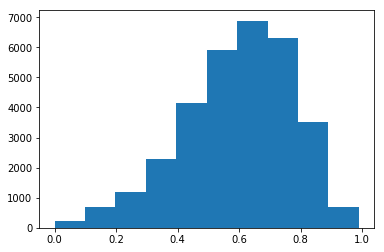

In [7]:
plt.hist(df.danceability)

(array([1374., 1354., 1722., 2187., 3189., 3817., 4378., 4720., 4809.,
        4302.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

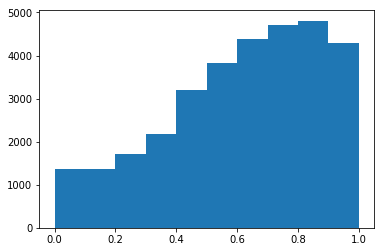

In [8]:
plt.hist(df.energy)

(array([   20.,    38.,    34.,    81.,   249.,   652.,  1407.,  5767.,
        19004.,  4600.]),
 array([-58.555, -52.541, -46.527, -40.513, -34.499, -28.485, -22.471,
        -16.457, -10.443,  -4.429,   1.585]),
 <a list of 10 Patch objects>)

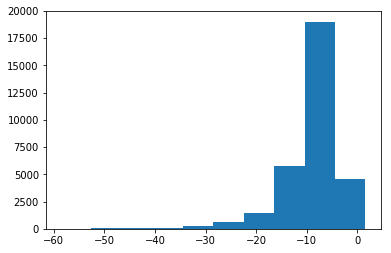

In [9]:
plt.hist(df.loudness)

(array([ 429., 1157., 3244., 7428., 9416., 8643., 5201., 1848.,  364.,
          56.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

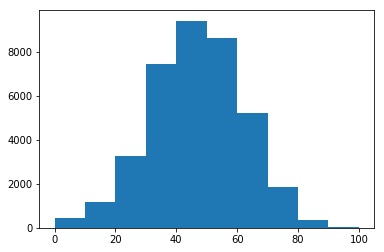

In [10]:
plt.hist(df.track_popularity)

/Users/davidbickham/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/davidbickham/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([22614.,   919.,   633.,   483.,   455.,   497.,   615.,   963.,
         2430.,  2243.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

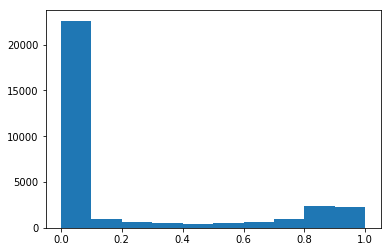

In [11]:
plt.hist(df.instrumentalness)

(array([1.130e+02, 1.800e+01, 9.240e+02, 7.489e+03, 9.862e+03, 8.216e+03,
        3.469e+03, 1.546e+03, 2.140e+02, 1.000e+00]),
 array([  0.    ,  24.8066,  49.6132,  74.4198,  99.2264, 124.033 ,
        148.8396, 173.6462, 198.4528, 223.2594, 248.066 ]),
 <a list of 10 Patch objects>)

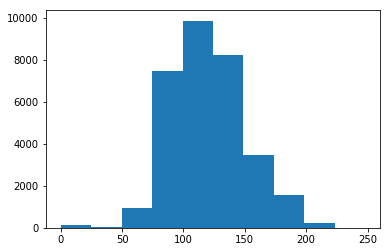

In [12]:
plt.hist(df.tempo)

(array([ 350., 1081., 2742., 4796., 6629., 7352., 7211., 4596., 2289.,
         740.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

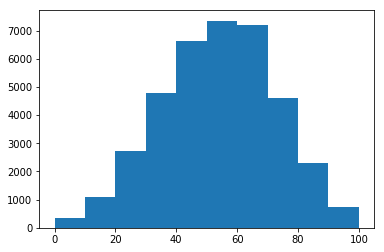

In [13]:
plt.hist(df.artist_popularity)

In [17]:
df.artist_follower_total.describe().round()

count       37724.0
mean       885426.0
std       2981245.0
min             0.0
25%          4436.0
50%         44645.0
75%        415262.0
max      43543394.0
Name: artist_follower_total, dtype: float64

In [18]:
df.track_duration.describe().round()

count      37786.0
mean      237792.0
std        98895.0
min        12515.0
25%       187478.0
50%       219784.0
75%       263788.0
max      4694040.0
Name: track_duration, dtype: float64

In [20]:
df.artist_name.value_counts(ascending=False)

Johnny Cash                                112
Reba McEntire                               91
Banda Sinaloense MS de Sergio Lizárraga     58
Lady Gaga                                   50
Taylor Swift                                49
Drake                                       47
Romeo Santos                                47
Kanye West                                  45
Prince Royce                                45
Julio Iglesias                              43
Angelique Kidjo                             43
Juanes                                      43
Café Tacvba                                 42
2Baba                                       42
Armin van Buuren                            41
Ali Farka Touré                             39
Ozuna                                       39
Don Schlitz                                 39
Maluma                                      34
Luis Miguel                                 30
Johann Sebastian Bach                       29
The Beatles  